### Análise Descritiva - Dados do Goodreads

#### Goodreads é uma rede social focada em leitura. É onde os fãs de livros compartilham suas passadas, atuais ou futuras leituras e um espaço de expressão sobre seus sentimentos acerca da leitura e do autor em questão. 
Unindo a minha busca por exercitar e a aprender cada vez mais a análise de dados e a minha paixão por leitura, trago esse notebook com algumas análises exploratórias sobre dados disponilibilizados pela API do GoodReads, que possuem variáveis como livros, autores, resenhas e notas dadas pelos leitores.

Os dados foram baixados de uma base disponibilizada por um usuário no Kaggle (https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks) e a inspiração dessa análise foi de um notebook feito pelo usuário SHIVAM RALLI, adaptando códigos e soluções de acordo com hipóteses que gostaria de provar.

Hipóteses:
- Há uma correlação positiva entre número de resenhas (text_reviews_count) e número de notas dada pelos leitores (ratings_count)
- J.K Rowling é a autora com mais resenhas e maior média de nota
- Os top 10 livros que mais aparecem e/ou com maior média de notas são os conhecidos como "clássicos"
- Os livros com língua inglesa são os que mais aparecem
- A média de nota dada é em torno de 3

- bookID - Identificação de cada livro para o Goodreads
- title - Título do Livro
- authors - Escritor do livro 
- average_rating - Média da nota dada pelos leitores 
- ISBN ISBN(10) - identificação única de cada livro, traz dados como edição e editora
- ISBN 13 - novo formato de ISBN
- language_code - língua original do livro
- Num_pages - Número de páginas do livro
- Ratings_count - Número de notas dada para o livro
- text_reviews_count - Número de resenhas dadas pelos leitores

importando bibliotecas

In [284]:
import numpy as np 
import pandas as pd
import os
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from tqdm import tqdm
import re
from scipy.cluster.vq import kmeans, vq
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [285]:
import warnings
warnings.filterwarnings("ignore")

importando a base

In [286]:
caminho_base = pathlib.Path('Goodreads')

base_gd = pd.read_csv('books.csv', error_bad_lines = False)

display(base_gd)


b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


In [287]:
base_gd.index = base_gd['bookID']

Verificando as principais informações da base, como tipos de cada variável e número de nulos

In [288]:
base_gd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11123 entries, 1 to 45641
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.1+ MB


Verifiquei que a autora J.K Rowling possui dois labels diferentes, então estou corrigindo para unificar essa informação

In [289]:
base_gd.replace(to_replace='J.K. Rowling-Mary GrandPré', value = 'J.K. Rowling', inplace=True)

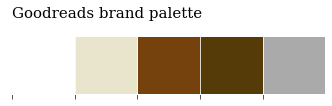

In [290]:
# Palette
sns.palplot(['#ffffff', '#e9e5cd', '#75420e','#553b08', '#aaaaaa'])

plt.title("Goodreads brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

Verficando se há correlação e o peso dessa correlação entre as variáveis

<AxesSubplot:>

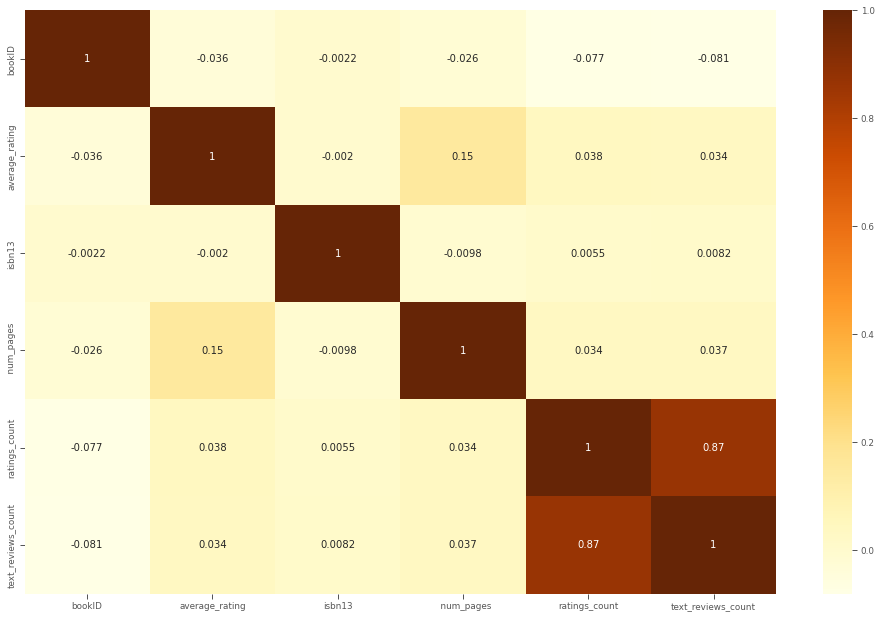

In [291]:
plt.figure(figsize=(15, 10))
sns.heatmap(base_gd.corr(), annot=True, cmap='YlOrBr')
#print(base_airbnb.corr())

Quanto mais próximo de 1 ou -1, mais correlacionadas são as variáveis.
Vemos que neste caso, as variáveis "text_reviews_count" e "ratings_count" possuem as correlações mais fortes, com cerca de 87%, o que indica que uma variável influencia na outra

Ranking dos top 10 livros com maior número de ocorrências

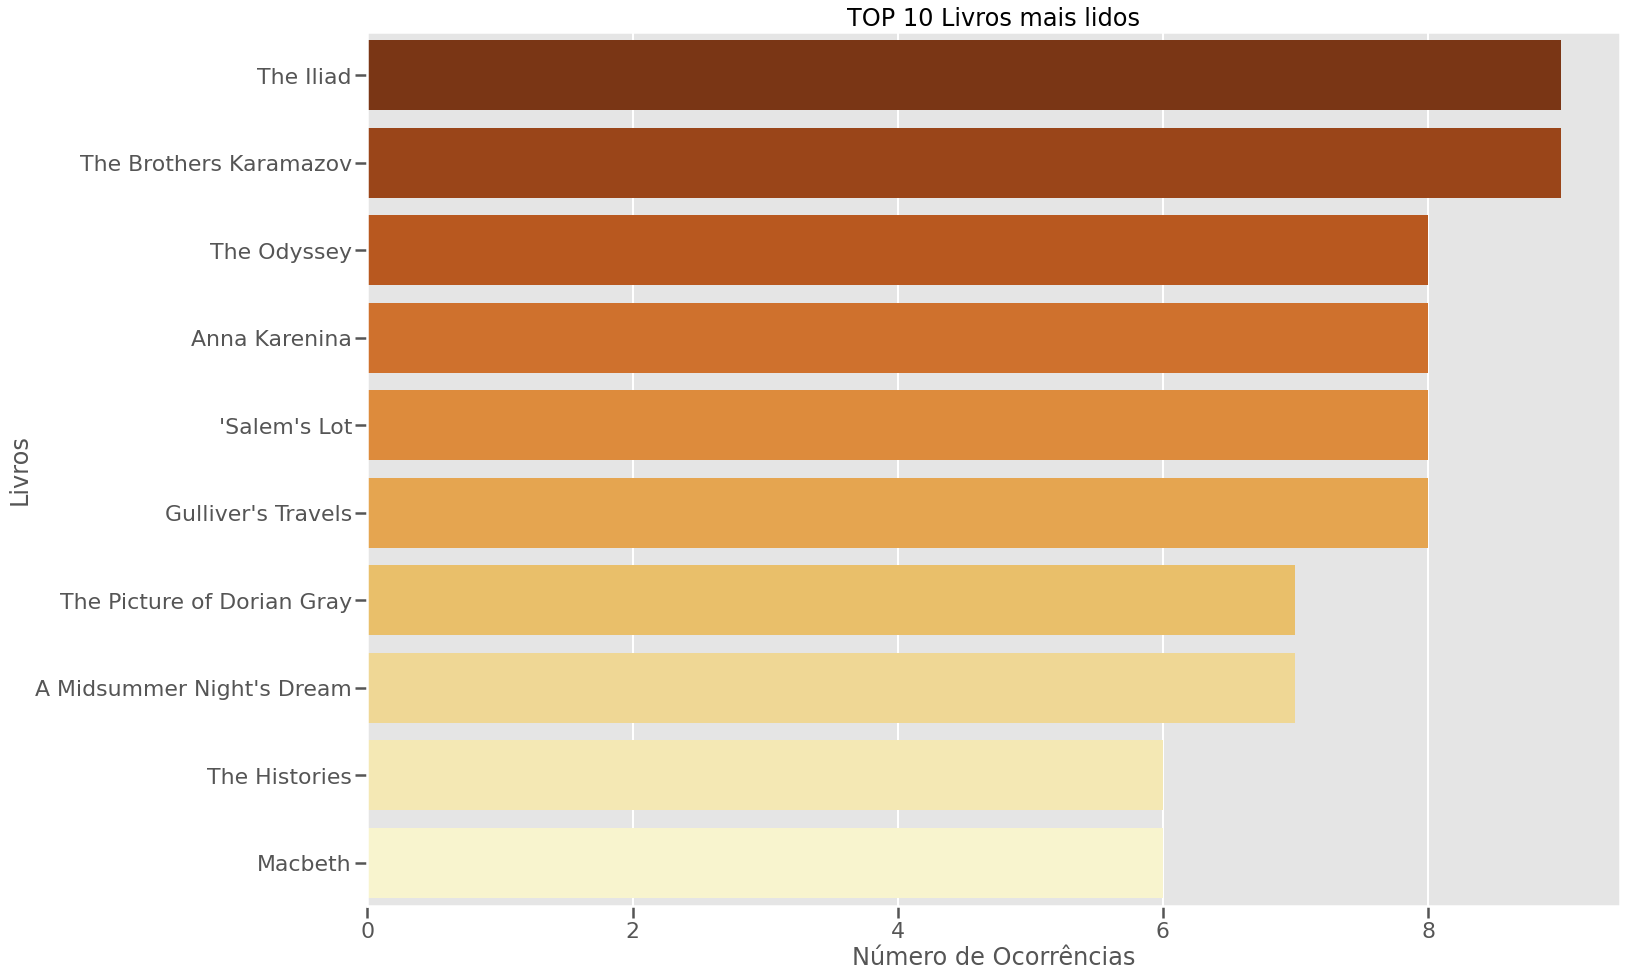

In [292]:
sns.set_context('poster')
plt.figure(figsize=(20,15))
books = base_gd['title'].value_counts()[:10]
rating = base_gd.average_rating[:10]
sns.barplot(x = books, y = books.index, palette='YlOrBr_r')
plt.title("TOP 10 Livros mais lidos")
plt.xlabel("Número de Ocorrências")
plt.ylabel("Livros")
plt.show()

Vemos que os top 10 livros com maior número de ocorrências são considerados como livros clássicos pelos estudiosos e amantes da leitura

Verificando quais são as línguas que mais aparecem na base

In [293]:
print(base_gd['language_code'].value_counts())

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64


Como vimos que na base a língua inglesa está separada para cada país em que é falada, o melhor caminho é agrupar todas esses registros

['eng', 'en-US', 'en-GB', 'en-CA']


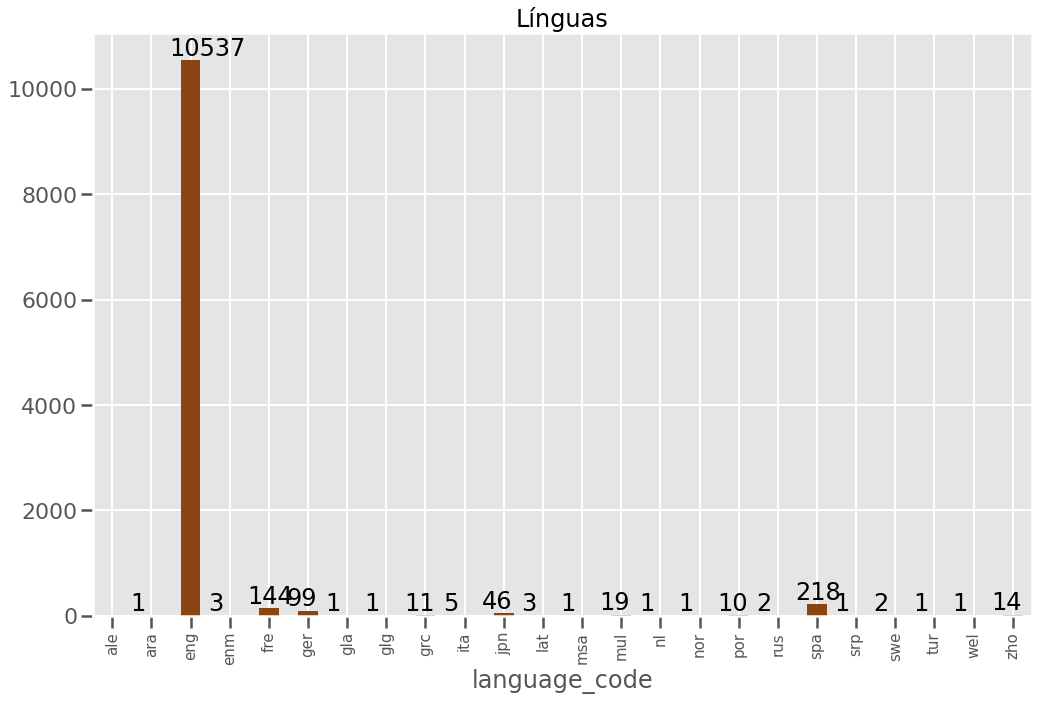

In [294]:
tabela_tipo_language = base_gd['language_code'].value_counts()
colunas_agrupar = []
english = ['en-US', 'eng', 'en-GB', 'en-CA']


for tipo in tabela_tipo_language.index:
    if tipo in english:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_gd.loc[base_gd['language_code']==tipo, 'language_code'] = 'eng'
    

plt.figure(figsize=(15,10))
ax = base_gd.groupby('language_code')['title'].count().plot.bar(color='saddlebrown')
plt.title('Línguas')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))


A hipótese é confirmada: a língua inglesa é que a mais aparece entre os livros lidos

Ranking dos top 10 livros com maior número de notas dadas

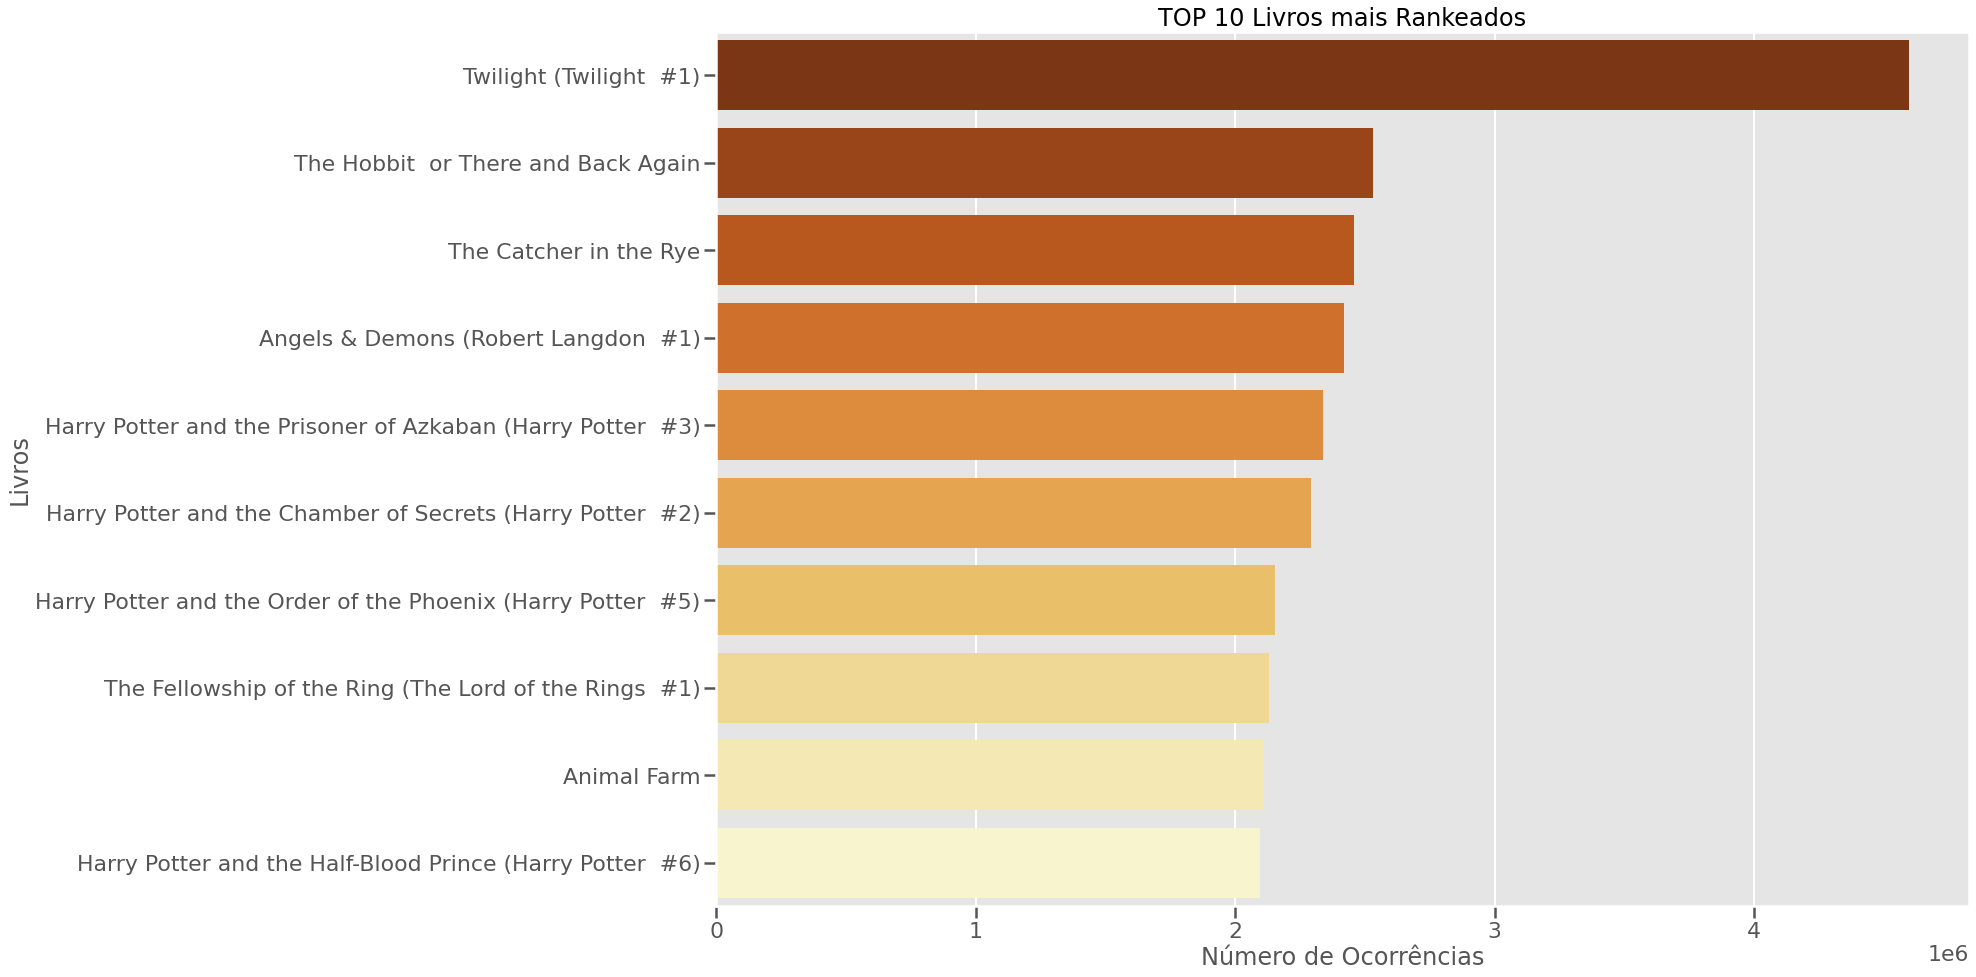

In [295]:
most_rated = base_gd.sort_values('ratings_count', ascending = False).head(10).set_index('title')
sns.set_context('poster')
plt.figure(figsize=(20,15))
books = base_gd['title'].value_counts()[:10]
rating = base_gd.ratings_count[:10]
sns.barplot(x = most_rated['ratings_count'], y = most_rated.index, palette='YlOrBr_r')
plt.title("TOP 10 Livros mais Rankeados")
plt.xlabel("Número de Ocorrências")
plt.ylabel("Livros")
plt.show()

Aqui vemos que os livros com maior número de notas dadas são majoritariamente livros infanto-juvenis, com "Twilight" aparecendo em primeiro lugar

Ranking dos top 10 autores com maior número de livros lidos

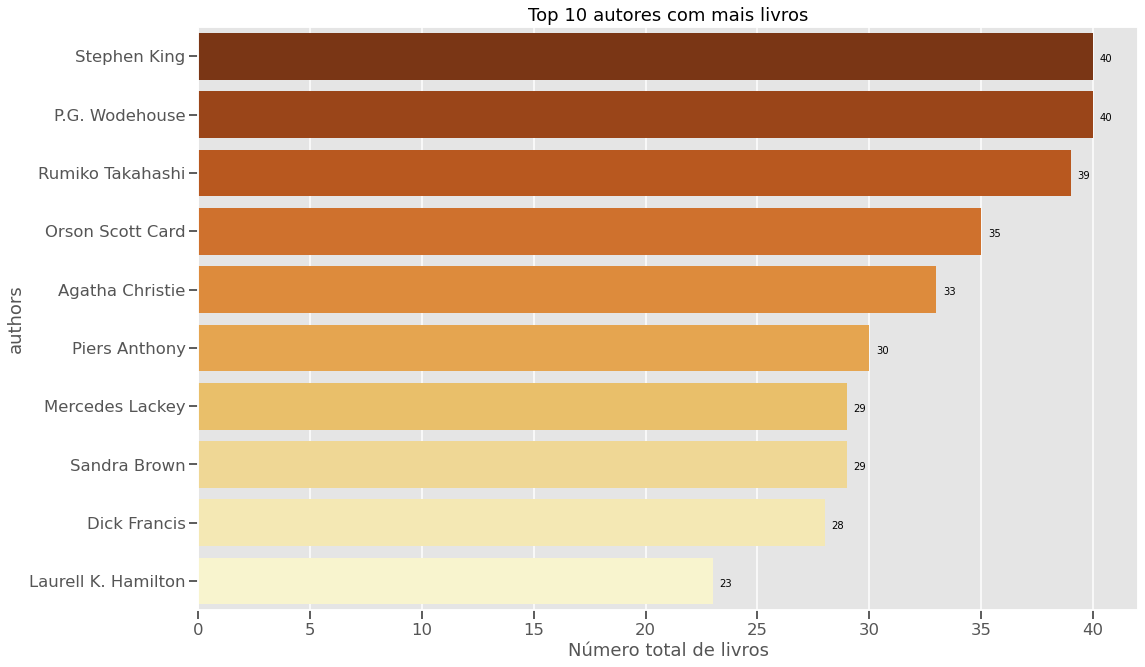

In [296]:
sns.set_context('talk')
most_books = base_gd.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='YlOrBr_r')
ax.set_title("Top 10 autores com mais livros")
ax.set_xlabel("Número total de livros")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

Concluímos que o autor com maior número de livros lidos é Stephen King. 
Uma hipótese é pelo fato do escritor já ter publicado cerca de 65 livros até hoje, apesar de o segundo lugar da lista (P.G Wodehouse) ter ainda mais livros publicados, cerca de 90, o que evidencia a popularidade de SK.

Ranking dos top 10 autores com maiores médias de nota recebida pelos leitores

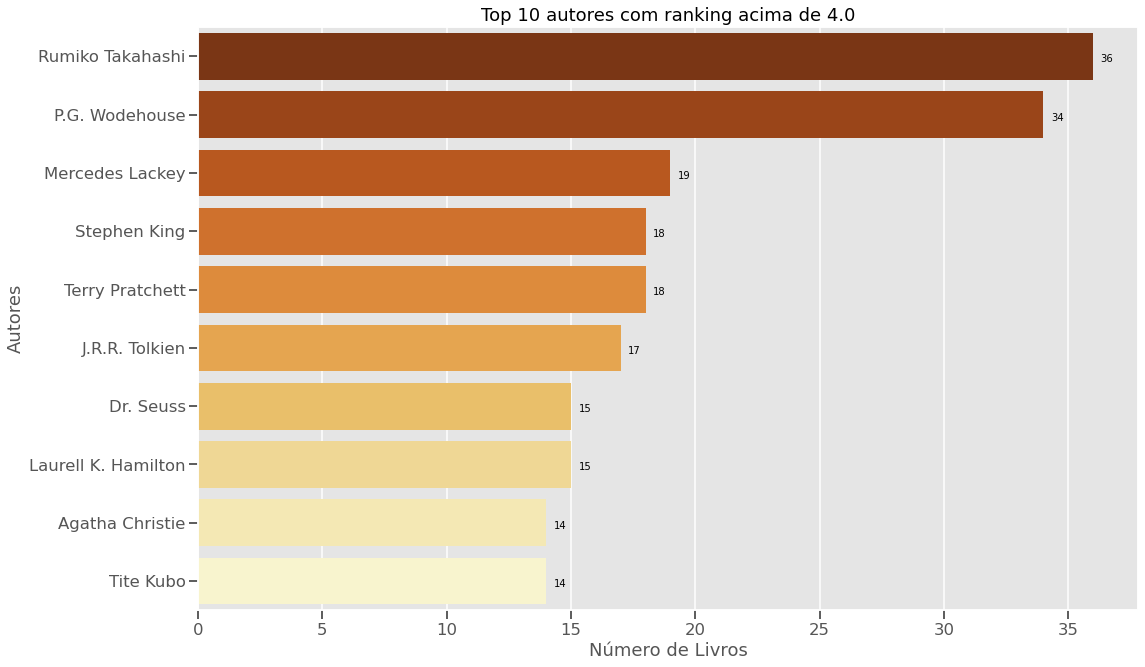

In [297]:
high_rated_author = base_gd[base_gd['average_rating']>=4.0]
high_rated_author = high_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(high_rated_author['title'], high_rated_author.index, palette='YlOrBr_r')
ax.set_xlabel("Número de Livros")
ax.set_ylabel("Autores")
ax.set_title("Top 10 autores com ranking acima de 4.0")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

Rumiko Takahashi foi o autor com maior número de livros lidos com nota acima de 4

Média de Nota Geral

<AxesSubplot:xlabel='average_rating', ylabel='Density'>

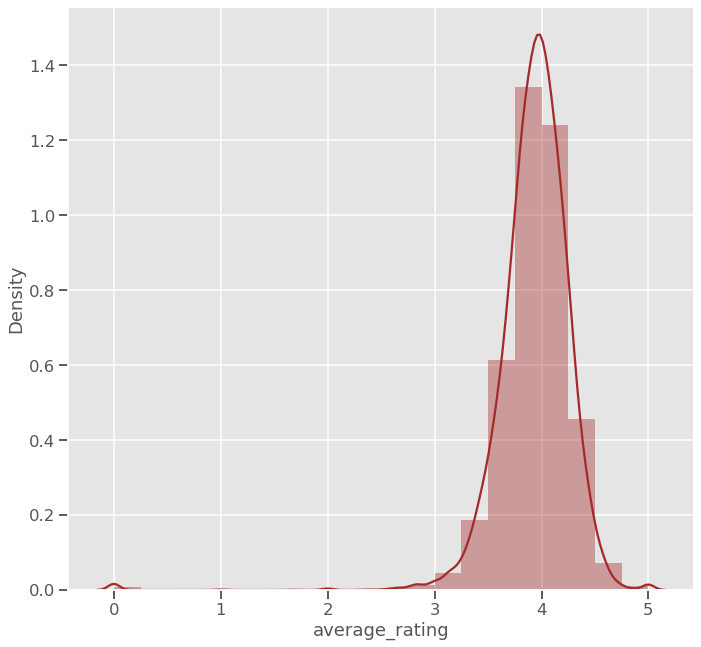

In [298]:
plt.figure(figsize=(10,10))
rating= base_gd.average_rating.astype(float)
sns.distplot(rating, bins=20, color='brown')

É possível ver que no geral as notas dadas estão em torno da média 4 e nota 5 é bem rara.

Para entender um pouco melhor sobre a distribuição das notas dadas, agrupei a média das notas em 5 grupos 

In [299]:
condicoes = [(base_gd['average_rating']>=4), 
             (base_gd['average_rating']>=3), 
             (base_gd['average_rating']>=2),
             (base_gd['average_rating']>=1),
             (base_gd['average_rating']>=0)]
opcoes = ["Entre 4 and 5", "Entre 3 and 4", "Entre 2 and 3", "Entre 1 and 2", "Entre 0 and 1"]
base_gd['rating_group'] = np.select(condicoes, opcoes, default="Null")


print(base_gd['rating_group'].value_counts())


Entre 3 and 4    6085
Entre 4 and 5    4954
Entre 2 and 3      56
Entre 0 and 1      25
Entre 1 and 2       3
Name: rating_group, dtype: int64


In [300]:
ratings_pie = base_gd['rating_group'].value_counts().reset_index()
labels = ratings_pie['index']

In [301]:
ratings_pie = base_gd['rating_group'].value_counts().reset_index()
labels = ratings_pie['index']

print(ratings_pie)

           index  rating_group
0  Entre 3 and 4          6085
1  Entre 4 and 5          4954
2  Entre 2 and 3            56
3  Entre 0 and 1            25
4  Entre 1 and 2             3


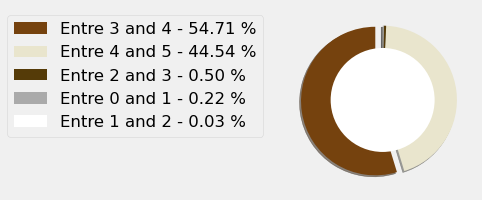

In [302]:
ratings_pie = base_gd['rating_group'].value_counts().reset_index()
labels = ratings_pie['index']
colors = ['#75420e','#e9e5cd','#553b08', '#aaaaaa', '#ffffff']
explode = [0.1, 0.0, 0.0, 0.0, 0.0]

plt.style.use('fivethirtyeight')

plt.pie(ratings_pie['rating_group'], explode=explode, shadow=True,  startangle=90, colors=colors)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]
plt.legend( labels, loc = 'best',bbox_to_anchor=(-0.1, 1.),)

plt.tight_layout()

plt.show()

Concluímos que a concentração da média de notas se destacou principalmente para o grupo "Entre 3 e 4", com quase 55%, seguida do grupo "Entre 4 e 5", com 44%

Avaliando se há um relacionamento entre a média de notas e o número de resenhas

<Figure size 1080x720 with 0 Axes>

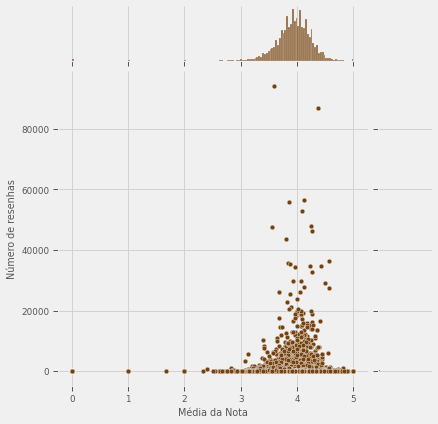

In [303]:
plt.figure(figsize=(15,10))
base_gd.dropna(0, inplace=True)
sns.set_context('paper')
ax =sns.jointplot(x="average_rating",y='text_reviews_count', 
                  kind='scatter',  data=base_gd[['text_reviews_count', 'average_rating']], color='#75420e')
ax.set_axis_labels("Média da Nota", "Número de resenhas")
plt.show()

O número de resenhas se concentra principalmente em torno de 5.000, enquanto que a média da nota fica em torno de 3 e 4

Avaliando se há um relacionamento entre a média de nota e número de páginas

<Figure size 1080x720 with 0 Axes>

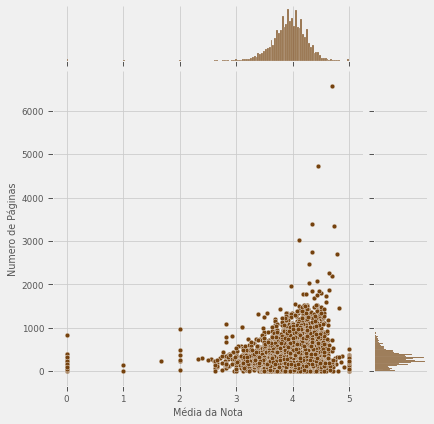

In [304]:
plt.figure(figsize=(15,10))
base_gd.dropna(0, inplace=True)
sns.set_context('paper')
ax =sns.jointplot(x="average_rating",y='  num_pages', 
                  kind='scatter',  data=base_gd[['  num_pages', 'average_rating']], color='#75420e')
ax.set_axis_labels("Média da Nota", "Numero de Páginas")
plt.show()

Aqui como há um número de outliers muito grande, filtrei essa visão para abaixo de 1000 páginas

<Figure size 1080x720 with 0 Axes>

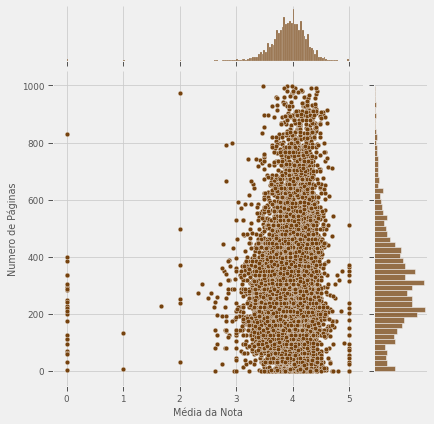

In [305]:
base_pages_filter = base_gd[~(base_gd['  num_pages']>1000)]

plt.figure(figsize=(15,10))
base_pages_filter.dropna(0, inplace=True)
sns.set_context('paper')
ax =sns.jointplot(x="average_rating",y='  num_pages', 
                  kind='scatter',  data=base_pages_filter[['  num_pages', 'average_rating']], color='#75420e')
ax.set_axis_labels("Média da Nota", "Numero de Páginas")
plt.show()

Com isso, é possível ver que livros com número de páginas entre 200-300 são os que mais possuem notas mais altas. 

Ranking de top 10 livros com mais reviews dados pelos leitores

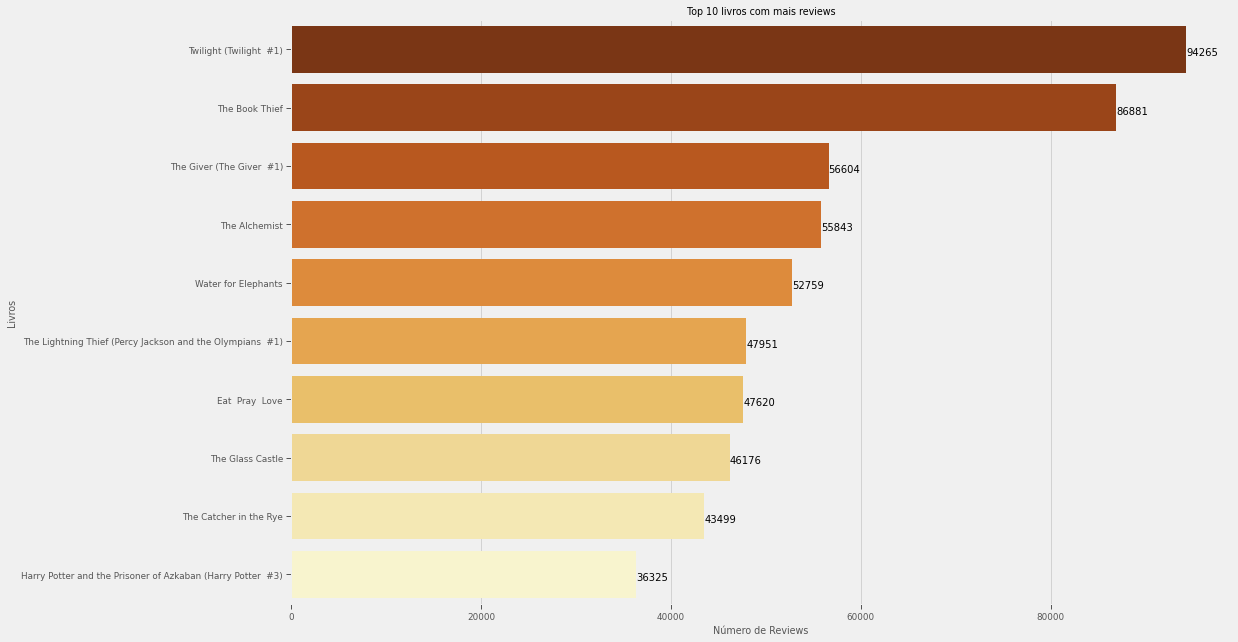

In [306]:
high_review_book = base_gd.sort_values('text_reviews_count', ascending = False).head(10).set_index('title')

plt.figure(figsize=(15,10))
ax = sns.barplot(high_review_book['text_reviews_count'], high_review_book.index, palette='YlOrBr_r')
ax.set_xlabel("Número de Reviews")
ax.set_ylabel("Livros")
ax.set_title("Top 10 livros com mais reviews")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')
plt.show()


Assim como o ranking de livros com maiores ocorrências de notas dadas, a lista continua bem semelhante quando analisamos o número de review dados, o que leva a crer que o leitor que se tende a dar uma nota à sua leitora, também se esforça em fazer uma resenha justificando a sua nota.